In [2]:
import numpy as np
import matplotlib.colors as colors
from colorspace import sequential_hcl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Rectangle,Patch
%run functions-py.py

In [3]:
all_suspense=np.load("../Data/suspense.npy")
avg_suspense = np.mean(all_suspense, axis = 0)
#np.save("../Data/avg_suspense.npy",avg_suspense.astype(np.float64))

In [4]:
t=len(avg_suspense)

In [5]:
x=range(t)
y=avg_suspense

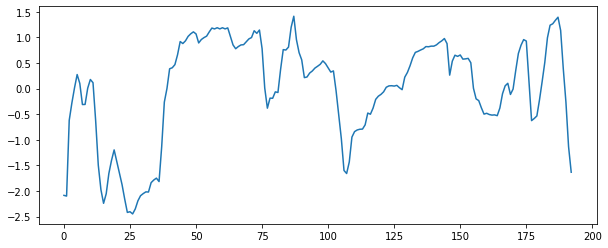

In [6]:
#Plot of average suspense
plt.subplots(figsize=(10,4))
plt.plot(all_suspense[4,:])

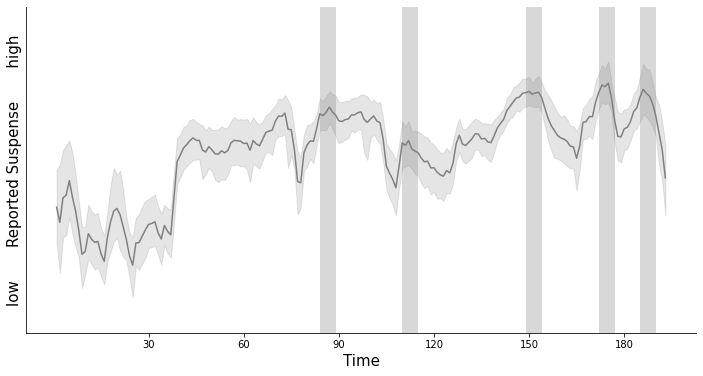

In [7]:
#Plot of average suspense 
#It's a copy from 
#https://github.com/nomcomm/CamCanSuspenseISC_JMP/blob/master/scripts/SchmaelzleGrall_JMP_03_CRMAnalysis.ipynb

values          = np.hstack(all_suspense)
times           = np.hstack([np.arange(193)] * 22)
values_times    = np.vstack((values,times)).T
df_values_times = pd.DataFrame(data =  values_times, columns = ['values','times'])

f, ax= plt.subplots(figsize=(12,6));
sns.lineplot(x     = "times", 
             y     = "values", 
             color = 'gray',
             data  = df_values_times);
#plt.plot(avg_suspense, color = 'gray');
plt.ylabel('low       Reported Suspense       high',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylim(-2.5,2);
plt.xticks([]);
plt.setp(ax.get_xticklabels(), fontsize=14)

g=30
ticks=np.arange(g-1,t+1,g)
plt.xticks(ticks=ticks,labels=ticks+1)
plt.yticks([]);

sns.despine();
rects=[]
peaks=[83,109,148,171,184]
for p in peaks:
    rect=Rectangle((p,-2.5),5,4.5)
    rects.append(rect)
    
pc = PatchCollection(rects, facecolor='gray', alpha=0.3,edgecolor=None)

ax.add_collection(pc)

#f.savefig('../Imagenes/avance_3/gray_suspense.png',bbox_inches='tight')

In [11]:
#my color
t_s=176
cmap=sns.color_palette("flare", as_cmap=True)
color=truncate_colormap(cmap,0,1,n=t_s)

# f=open('../Data/colors.txt','w')
# for i in range(176):
#     rgba = color(i)
#     #rgb2hex accepts rgb or rgba
#     f.write(colors.rgb2hex(rgba)+'\t')

# f.close()

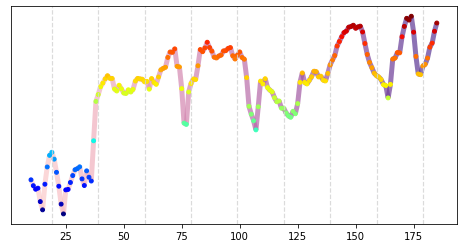

In [22]:
#My plot of suspense with level and flow of time (truncated)
t_s=176
fig,ax = plt.subplots(figsize=(8,4))
#color=truncate_colormap(plt.get_cmap('Purples'),0.2,1,n=200)
pal  = sequential_hcl("Purple-Orange", rev = True)
color=pal.cmap(300)

x= 10+np.arange(t_s)
y= avg_suspense[10:10+t_s]

g=20
ticks=np.arange(g-1,191+1,g)

line=colorline(x,y,x/t_s,cmap=color,alpha=0.7,linewidth=5,zorder=1) #time-line
im=plt.scatter(x,y,s=15, c=avg_suspense[10:10+t_s],cmap=plt.get_cmap('jet')) #dots

for i in ticks:
    plt.axvline(x=i,color='lightgray',alpha=0.8,linestyle='dashed',linewidth=1.2) 

#ax.set_xticks([])
ax.set_yticks([])

# fig.subplots_adjust(right=0.8,bottom=0.2)
# cbar1_ax = fig.add_axes([0.085, 0.215, 0.03, 0.64]) #left, bottom, width, height
# cbar1=fig.colorbar(im,cax=cbar1_ax)
# cbar1.ax.set_ylabel('Level of suspense',rotation=90,fontsize=14,labelpad=-40)
# cbar1.set_ticks([])
# cbar2_ax = fig.add_axes([0.155, 0.13, 0.615, 0.05]) #left, bottom, width, height

# plt.xticks(ticks=ticks,labels=ticks+1)

# cbar2=fig.colorbar(line,cax=cbar2_ax,ticks=ticks/t_s,orientation='horizontal')
# cbar2.ax.set_xlabel('States',fontsize=14,labelpad=5)
# _=cbar2.ax.set_xticklabels([str(i) for i in ticks+1])

fig.savefig('../Imagenes/thesis/color_suspense_bars.pdf',bbox_inches='tight')

In [8]:
blocks1 = np.array([[1,22],[89,109],[112,145],[146,176]])

In [9]:
y=[np.mean(np.array(avg_suspense[i:i+18])) for i in range(t-17)]

In [15]:
color=['yellow','khaki','lawngreen','turquoise']
for cl in color[0:4]:
    print(colors.rgb2hex(cl))

#ffff00
#f0e68c
#7cfc00
#40e0d0


In [16]:
blocks1 = np.array([[1,22],[89,109],[112,145],[146,176]])
blocks2 = np.array([[100,103],[154,163],[165,170]])
blocks3 = np.array([[26,29],[106,108]])
#blocks=np.array([[90,113],[147,176]])

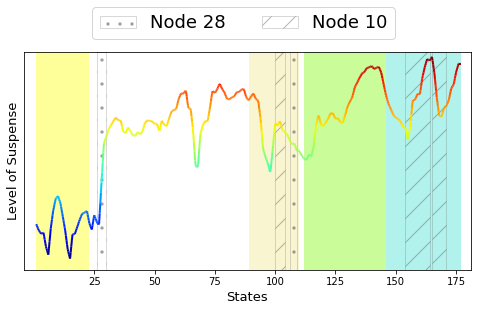

In [17]:
#Suspense with blocks from Mapper graph

length=176*4
new_x = np.linspace(0, t-17, length)
new_y=np.interp(new_x, range(t-17), avg_suspense[10:10+t-17])
          
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([new_x, new_y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(figsize=(8,4))
#plt.plot(y,color='gray',alpha=0.3)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(avg_suspense[10:10+t-17].min(), avg_suspense[10:10+t-17].max())
lc = LineCollection(segments, cmap='jet', norm=norm)
# Set the values used for colormapping
lc.set_array(new_y)
lc.set_linewidth(2)
line = axs.add_collection(lc)
#cbar=fig.colorbar(line, ax=axs)
#cbar.set_ticks([])

axs.set_xlim(-5, 180)
axs.set_ylim(-1.7, 1)
plt.xlabel('States',fontsize=13)

g=25
ticks=np.arange(g-1,t+1,g)
plt.xticks(ticks=ticks,labels=ticks+1)
plt.yticks([])

plt.ylabel('Level of Suspense',fontsize=13)

rects1=[]
block1=blocks1-1
for i in range(block1.shape[0]):
    rect=Rectangle((block1[i,0],-1.7),block1[i,1]+1-block1[i,0],2.7)
    rects1.append(rect)
     
pc1 = PatchCollection(rects1, facecolor=color, alpha=0.4,edgecolor=None)
#===========================================================================================
rects2=[]
block2=blocks2-1
for i in range(block2.shape[0]):
    rect=Rectangle((block2[i,0],-1.7),block2[i,1]+1-block2[i,0],2.7)
    rects2.append(rect)
     
pc2 = PatchCollection(rects2,alpha=0.5,edgecolor="dimgray",lw = .5,hatch='/',facecolor='none')
p2=Patch(alpha=0.5,edgecolor="dimgray",lw = .5,hatch='/',facecolor='none',label='Node 10')

#=========================================================================================
rects3=[]
block3=blocks3-1
for i in range(block3.shape[0]):
    rect=Rectangle((block3[i,0],-1.7),block3[i,1]+1-block3[i,0],2.7)
    rects3.append(rect)
     
pc3 = PatchCollection(rects3,alpha=0.5,edgecolor="dimgray",lw = .5,hatch='.',facecolor='none')
p3=Patch(alpha=0.5,edgecolor="dimgray",lw = .5,hatch='.',facecolor='none',label='Node 28')
#====================================================================================
axs.add_collection(pc1)
axs.add_collection(pc2)
axs.add_collection(pc3) 

handles=[p3,p2]
axs.legend(handles=handles,bbox_to_anchor=(0.85, 1.25),ncol=5,prop={'size': 18})

# for i in blocks.flatten():
#plt.axvline(x=72,color='gray',alpha=0.8,linestyle='dashed',linewidth=1.2) 

#plt.axhline(y=-0.7,color='black')
#plt.axhline(y=0.35,color='black')
plt.show()
#fig.savefig('../Imagenes/avance_3/color_suspense.pdf',bbox_inches='tight')
#fig.savefig('../Imagenes/thesis/color_suspense_patches.pdf',bbox_inches='tight')

In [33]:
color=['khaki','lawngreen','turquoise']
for cl in color[0:4]:
    print(colors.rgb2hex(cl))

#f0e68c
#7cfc00
#40e0d0


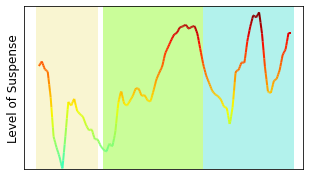

In [44]:
#Suspense with blocks from Mapper graph (truncated from 99)
length=86*4
new_x = np.linspace(0, 86, length)
new_y=np.interp(new_x, range(86), avg_suspense[99:99+86])
          
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([new_x, new_y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(figsize=(5,3))
#plt.plot(y,color='gray',alpha=0.3)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(avg_suspense[10:10+t-17].min(), avg_suspense[10:10+t-17].max())
lc = LineCollection(segments, cmap='jet', norm=norm)
# Set the values used for colormapping
lc.set_array(new_y)
lc.set_linewidth(2)
line = axs.add_collection(lc)
#cbar=fig.colorbar(line, ax=axs)
#cbar.set_ticks([])

axs.set_xlim(-5, 90)
axs.set_ylim(-0.5, 1)
# plt.xlabel('States',fontsize=13)

# g=25
# ticks=np.arange(100,t+1,g)
# plt.xticks(ticks=ticks-90,labels=ticks)
plt.xticks([])
plt.yticks([])

plt.ylabel('Level of Suspense',fontsize=12)

rects1=[]
block1=blocks1[1:]-90
for i in range(block1.shape[0]):
    rect=Rectangle((block1[i,0],-1.7),block1[i,1]+1-block1[i,0],2.7)
    rects1.append(rect)
     
pc1 = PatchCollection(rects1, facecolor=color, alpha=0.4,edgecolor=None)

#====================================================================================
axs.add_collection(pc1)

# for i in blocks.flatten():
#plt.axvline(x=72,color='gray',alpha=0.8,linestyle='dashed',linewidth=1.2) 

#plt.axhline(y=-0.7,color='black')
#plt.axhline(y=-0.5,color='black')
plt.show()
#fig.savefig('../Imagenes/avance_3/color_suspense.pdf',bbox_inches='tight')
fig.savefig('../Imagenes/thesis/color_suspense_patches_cut.pdf',bbox_inches='tight')